# Day 3 ML Best model Review
[![Author - DanRamirez](https://img.shields.io/badge/Author-DanRamirez-2ea44f?style=for-the-badge)](https://github.com/Dandata0101)
![Python - Version](https://img.shields.io/badge/PYTHON-3.11-red?style=for-the-badge&logo=python&logoColor=white)
[![Project Repo](https://img.shields.io/badge/Our_Project_Repo-Visit-blue?style=for-the-badge&logo=github&logoColor=white)](https://github.com/Dandata0101/mbs-fraud-detection)

## Comprehensive Approach to ML Model Evaluation

This report describes a methodical approach to ML model evaluation in the context of credit card fraud detection and loan default prediction, highlighting the effectiveness of Random Forest in these scenarios. It underscores the necessity of thorough data preprocessing, the selection of appropriate models based on dataset characteristics, and the importance of evaluating models using a variety of metrics to ensure balanced performance across different prediction tasks.

The ultimate goal of the model evaluation process is to identify the model that not only performs best according to key metrics but also aligns with the specific needs and constraints of the application at hand. This involves considering factors such as:

- **Model Complexity**: More complex models may offer higher accuracy but at the cost of interpretability and increased computational resources.
- **Generalization Capability**: The model's ability to perform well on unseen data is paramount to ensure its reliability in real-world scenarios.
- **Operational Constraints**: Deployment considerations, such as real-time prediction requirements and hardware limitations, can influence model choice.

The need to select the best ML model is driven by the pursuit of optimal performance, cost-efficiency, and reliability in operational environments. As demonstrated in this report, a methodical approach to model evaluation, grounded in thorough data preparation and nuanced understanding of evaluation metrics, is essential to achieving these goals in the domains of credit card fraud detection and loan default prediction.

### Data Preparation: The Foundation

Before diving into model selection and evaluation, data must be meticulously prepared. This involves converting datasets into efficient formats like Parquet to enhance processing speeds and applying comprehensive data cleaning techniques. Such preparation ensures that the ML models have access to high-quality data, free from inconsistencies or errors that could skew results.

### Model Selection: Tailoring to Dataset Characteristics

Selecting an ML model is not a one-size-fits-all scenario. Each dataset, with its unique characteristics and complexities, requires careful consideration of which model to employ. For instance, the Random Forest algorithm's superior performance in both applications underscored in this report is largely due to its ability to handle the nuances and complexities inherent in the datasets used for credit card fraud detection and loan default prediction. This selection process involves evaluating a model's suitability based on the dataset's features, such as dimensionality, distribution, and the presence of non-linear relationships.

### Model Evaluation: Beyond Accuracy

While accuracy is often the go-to metric for model evaluation, it does not paint a complete picture, especially in scenarios where class imbalance is prevalent. The report emphasizes the importance of employing a variety of metrics to gain a comprehensive understanding of a model's performance. Precision, recall, F1-score, and the area under the receiver operating characteristic curve (AUROC) are crucial for assessing how well a model can generalize its predictions across all classes, particularly the minority class in imbalanced datasets.


## Key Functions used &#x1F916;
1. [Csv to Parquet conversion &#x1F4BE;](https://github.com/Dandata0101/mbs-fraud-detection/blob/main/scripts/csvtopaquet.py)
2. [Clean Data &#x1F9F9;](https://github.com/Dandata0101/mbs-fraud-detection/blob/main/scripts/dataclean.py)
3. [ML Models &#x1F916;&#x1F4C8;](https://github.com/Dandata0101/mbs-fraud-detection/blob/main/scripts/models.py)


# File Flatenning
this function cut the file size in more than half by converting from csv to Parquet

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
from scripts.csvtopaquet import csv_to_parquet_single_file

current_directory = os.getcwd()
csv4_file_path = os.path.join(current_directory, '01-data', 'FD_creditcard_data.csv')
csv4_file_path = os.path.join(current_directory, '01-data', 'FD_02_apl_train.csv')
output_file_path4 = os.path.join(current_directory, '01-data', 'FD_creditcard_data.parquet')
output_file_path5 = os.path.join(current_directory, '01-data', 'FD_02_apl_train.parquet')

'''
csv_to_parquet_single_file(csv_file_path=csv4_file_path, output_file_path=output_file_path4, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv5_file_path, output_file_path=output_file_path5, chunksize=100000, sample_rows=None, drop_columns=None)
'''

# loading Data

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

current_directory = os.getcwd()
parquetFile4 = os.path.join(current_directory, '01-data', 'FD_creditcard_data.parquet')
parquetFile5 = os.path.join(current_directory, '01-data', 'FD_02_apl_train.parquet')
df4 = pd.read_parquet(parquetFile4)
df5 = pd.read_parquet(parquetFile5)

# Model comparsions (FD_creditcard_data)

In [ ]:
from scripts.models import logistic_regression_model, train_and_evaluate_decision_tree,train_and_evaluate_random_forest,train_and_evaluate_knn,train_and_evaluate_gaussian_nb
_=logistic_regression_model(df4, target_column='Class', drop_columns=['id'], add_constant=True, return_type='Summary')
_= train_and_evaluate_decision_tree(df4, 'Class', ['id'],test_size=0.3, random_state=42, return_accuracy_only=True, top_n_features=20)
_= train_and_evaluate_random_forest(df4, 'Class', ['id'], test_size=0.3, random_state=42, return_accuracy_only=True, top_n_features=20)
_= train_and_evaluate_knn(df4, 'Class', ['id'], n_neighbors=5, return_accuracy_only=True)
_= train_and_evaluate_gaussian_nb(df4, 'Class', ['id'], return_accuracy_only=True)

**Insights**:
- The comparison between different models for the `FD_creditcard_data` dataset shows a clear distinction in model performance, with Random Forest achieving the highest accuracy at 99.93%, followed closely by Decision Tree and KNN models. The Gaussian Naive Bayes model, however, lags behind significantly with an accuracy of 98.28%.
- This performance disparity suggests that ensemble methods like Random Forest are more adept at handling the complexities and nuances of the credit card fraud detection dataset, likely due to their ability to model non-linear relationships and interactions between variables more effectively than simpler models like Gaussian Naive Bayes.
- The logistic regression details further substantiate the importance of feature selection and the impact of different variables on predicting fraudulent transactions. For instance, the variables with significant p-values (e.g., V14, V19, Amount) indicate a stronger relationship with the outcome (Class), highlighting the necessity for careful feature engineering and selection in improving model accuracy.



### Logistic Regression details

In [ ]:
import pandas as pd
from scripts.models import logistic_regression_model
summary=logistic_regression_model(df4, target_column='Class', drop_columns=['id'], add_constant=True, return_type='Summary')
print(summary)

## Logistic Regression Analysis

The provided output summarizes the results of a logistic regression model. This model is used to examine the relationship between a binary dependent variable and one or more independent variables. Here is an interpretation of the findings:

## Model Overview

- **Method Used**: Maximum Likelihood Estimation (MLE)
- **Model Fit**: The Pseudo R-squared value is 0.885, suggesting a potentially strong relationship between the predictors and the binary outcome, though this metric should be interpreted with caution.
- **Model Significance**: The LLR p-value is extremely low (near zero), indicating that the model is a significantly better fit than an intercept-only model.

## Coefficients

### Significant Predictors

- `const`: The intercept has a coefficient of -10.4734, with a p-value of 0.000, indicating a significant effect when all predictors are at their reference levels.
- `V7`: Coefficient of -0.8877, p-value of 0.010, suggesting a significant negative association with the outcome.
- `V19`: Coefficient of 1.2134, p-value of 0.030, suggesting a significant positive association with the outcome.
- `V26`: Coefficient of -1.9294, p-value of 0.000, indicating a significant negative relationship with the outcome.

### Insignificant Predictors

- Variables such as `age`, `maritalStatus`, `gender`, `familyIncome`, and several others have p-values greater than 0.05, implying that there is not enough statistical evidence to assert they have a meaningful impact on the outcome.

## Model Diagnostics

- **Standard Error (std err)**: Provides an estimate of the variability of the coefficient estimates.
- **Z-values**: Represent the ratio of the coefficient to its standard error. A larger absolute value indicates stronger evidence against the null hypothesis that the coefficient is zero.
- **95% Confidence Intervals**: If this range does not include zero, it suggests that the coefficient is significantly different from zero.

## Conclusion

The significant predictors identified by this model are of particular interest, as they have a statistically significant relationship with the outcome variable. However, the real-world significance of these findings requires careful consideration of the context and the effect size (odds ratios), which would need to be calculated from the coefficients.

## Notes

- **Practical vs. Statistical Significance**: It is essential to consider both the statistical significance (p-values) and the practical significance (effect size, or odds ratio) of the findings.
- **Interpretation of Odds Ratios**: For significant predictors, exponentiating the coefficients (e^coef) would provide the odds ratios, which are more interpretable in terms of the likelihood of the outcome occurring.



# Numeric and Dummy Varibles dataset (FD_02_apl_train)


## Clean Data

In [2]:
from scripts.dataclean import preprocess_for_lightgbm
processed_data = preprocess_for_lightgbm(df5, 'SK_ID_CURR')

Sample of the processed data saved to: /Users/danramirez/mbs-fraud-detection/02-output/testmerge.csv


## Model comparsions

In [ ]:
from scripts.models import train_and_evaluate_decision_tree,train_and_evaluate_random_forest,train_and_evaluate_knn,train_and_evaluate_gaussian_nb
print('')
print('')

_= train_and_evaluate_decision_tree(processed_data, 'TARGET', [],test_size=0.3, random_state=42, return_accuracy_only=True, top_n_features=20)
_= train_and_evaluate_random_forest(processed_data, 'TARGET', [], test_size=0.3, random_state=42, return_accuracy_only=True, top_n_features=20)
_= train_and_evaluate_knn(processed_data, 'TARGET', [], n_neighbors=5, return_accuracy_only=True)
_= train_and_evaluate_gaussian_nb(processed_data, 'TARGET', [], return_accuracy_only=True)

## Model Details review

- The `FD_02_apl_train` dataset underwent several model comparisons, showcasing diverse performance across various algorithms. Notably, Random Forest emerged as the leading model with an accuracy of 91.97%, closely followed by Gaussian Naive Bayes and KNN, both demonstrating high accuracy levels above 91%. This indicates a strong ability of these models to generalize well over the dataset.
- The decision tree model displayed a comparatively lower accuracy of 85.20%. This divergence in performance may highlight the decision tree's sensitivity to the specific characteristics of the dataset, such as its feature distribution or the presence of complex, non-linear relationships that ensemble methods like Random Forest can better capture.
- A deeper analysis into the classification reports reveals critical insights. For instance, the decision tree model's classification report illustrates its capacity to achieve high precision and recall for the majority class but faces challenges with the minority class. This pattern suggests a potential overfitting to the majority class or a need for more nuanced feature engineering to improve minority class predictions.
- Random Forest's classification report exhibits high precision for the majority class but a total inability to predict the minority class correctly, as indicated by a recall of 0. This could point to the model's overemphasis on the majority class, likely due to class imbalance. It underscores the importance of employing techniques like class weight adjustment, oversampling, or undersampling to enhance the model's sensitivity towards the minority class.
- The comparative analysis also underlines the significance of model evaluation beyond mere accuracy metrics. It highlights the need to consider a model's performance in terms of precision, recall, and the f1-score to ensure a balanced predictive capability across all classes, which is crucial for applications like fraud detection where the minority class (fraudulent transactions) is of particular interest.
- These insights suggest that while Random Forest offers the highest accuracy for the `FD_02_apl_train` dataset, there remains room for improvement, especially in handling class imbalance and enhancing minority class prediction. Future efforts could explore more sophisticated ensemble techniques, advanced feature engineering, and fine-tuning of model parameters to achieve a more equitable performance across classes.

These insights are critical for understanding the strengths and limitations of various models applied to the `FD_02_apl_train` dataset, guiding future modeling efforts towards achieving not only high accuracy but also balanced precision and recall across classes.


### Decision Tree

In [ ]:
from scripts.models import logistic_regression_model,train_and_evaluate_decision_tree,train_and_evaluate_random_forest,train_and_evaluate_knn,train_and_evaluate_gaussian_nb

train_and_evaluate_decision_tree(processed_data, target_column='TARGET', drop_columns=[], return_accuracy_only=False)

### Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.67      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.79      0.50      0.48     92254
weighted avg       0.90      0.92      0.88     92254



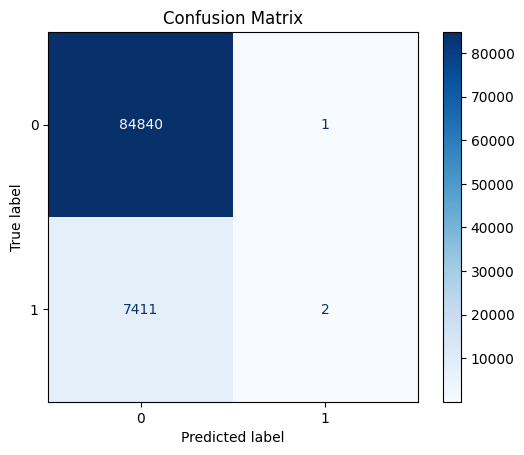

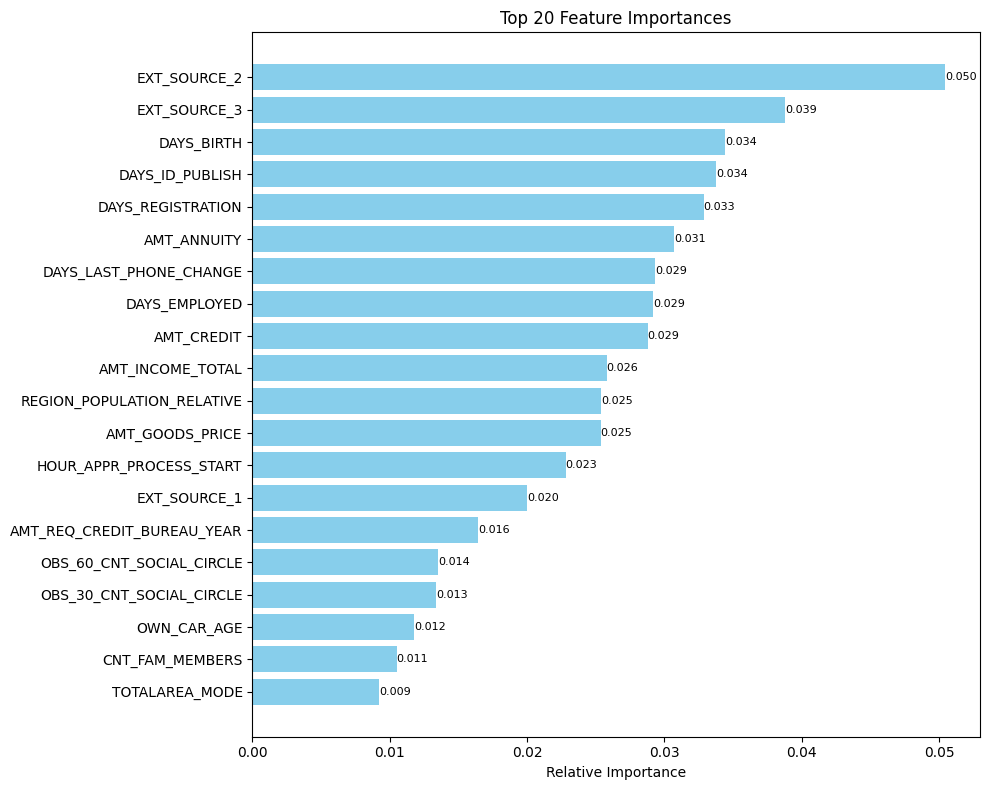

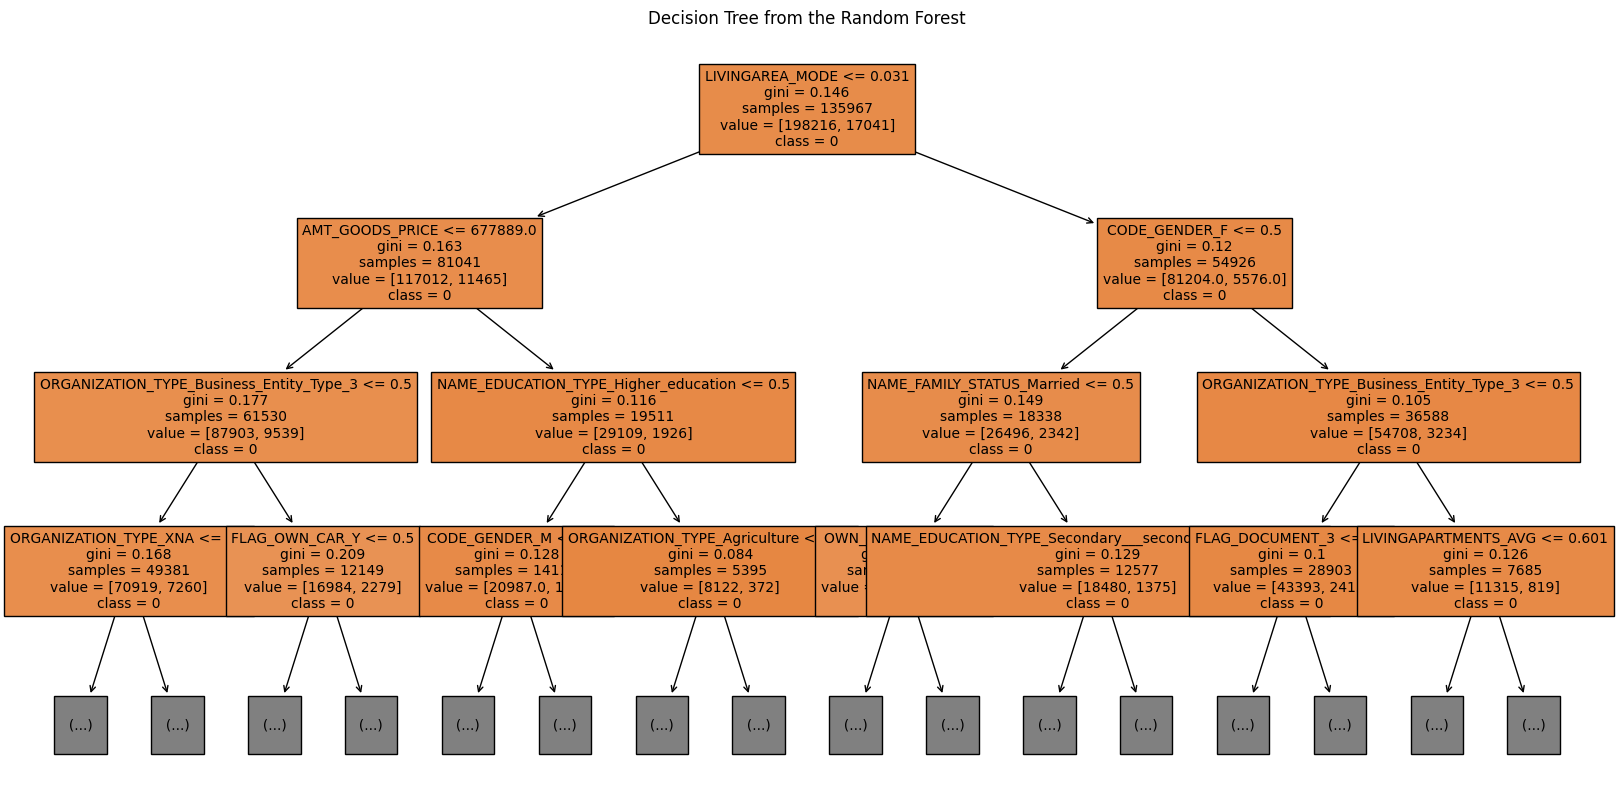

In [4]:
from scripts.models import logistic_regression_model,train_and_evaluate_decision_tree,train_and_evaluate_random_forest,train_and_evaluate_knn,train_and_evaluate_gaussian_nb
train_and_evaluate_random_forest(processed_data, target_column='TARGET', drop_columns=[], return_accuracy_only=False)


### KNN and gaussian

In [ ]:
train_and_evaluate_knn(processed_data, 'TARGET', [], n_neighbors=5, return_accuracy_only=False)
train_and_evaluate_gaussian_nb(processed_data, 'TARGET', [], return_accuracy_only=False)

## SMOTE

Evaluating: Random Forest
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    113167
           1       0.67      0.00      0.00      9838

    accuracy                           0.92    123005
   macro avg       0.79      0.50      0.48    123005
weighted avg       0.90      0.92      0.88    123005



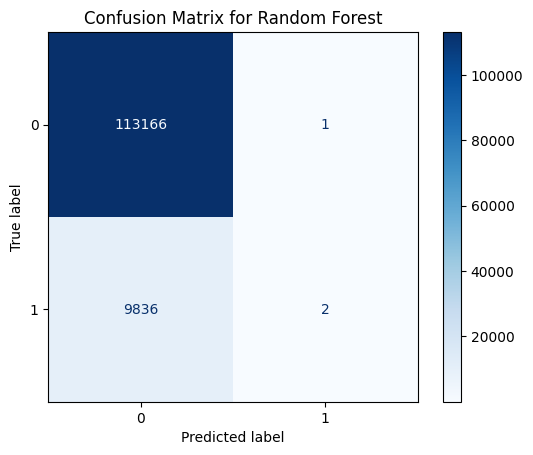

In [3]:
from scripts.smote import evaluate_models_and_visualize_smote

evaluate_models_and_visualize_smote(processed_data, 'TARGET', ['Random Forest'],[])

#Example
# evaluate_models_and_visualize_smote(df, 'Target', ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'KNN', 'Gaussian NB'], ['Column1', 'Column2'])